<a href="https://colab.research.google.com/github/danish-khan962/Deep-Learning/blob/main/04_Computer_vision_and_CNN_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow**

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## **ARCHITECTURE OF CNN**

| Hyperparameter/Layer type | What does it do? | Typical values |
| :------------------------ | : -------- | :----------- |
| Input image(s) | Target images you'd like to discover patterns in | Whatever you can take a photo (or video) of|
| Input layer | Takes in target images and preprocesses them for further layers | input_shape = [batch_size, image_height, image_width, color_channels] |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with `tf.keras.layer.ConvXD` (X can be multiple values)  |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually `relu` |
| Pooling layer | Reduces the dimensionality of learned image features | Average (`tf.leras.layers.AvgPool2D`) or Max (`tf.keras.layers.MaxPool2D`) |
| Fully connected layer | Further refines learned features from convolution layers | `tf.keras.layers.Dense` |
| Output layer | Takes learned features and outputs them in shape of target labels | output_Shape = [number_of_classes] (e.g. 3 for pizza, steak or sushi) |
| Output Activation | Adds non-linearity output layer | `tf.keras.activations.sigmoid` (binary classification) or `tf.keras.activations.softmax` (multiclass classification). |

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified if to only use two classes (pizza & steak)

In [1]:
import tensorflow as tf
print("Tensorflow we're using: ", tf.__version__)

Tensorflow we're using:  2.19.0


In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-08-17 06:12:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   198MB/s    in 0.5s    

2025-08-17 06:12:33 (198 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [6]:
import os

# Walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} in images in '{dirpath}")

There are 2 directories and 0 in images in 'pizza_steak
There are 2 directories and 0 in images in 'pizza_steak/test
There are 0 directories and 250 in images in 'pizza_steak/test/steak
There are 0 directories and 250 in images in 'pizza_steak/test/pizza
There are 2 directories and 0 in images in 'pizza_steak/train
There are 0 directories and 750 in images in 'pizza_steak/train/steak
There are 0 directories and 750 in images in 'pizza_steak/train/pizza


In [7]:
# Another way to find out that how many images are in a file
num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza"))
num_pizza_images_train

750

To visualize our images, first let's get the class names.

In [8]:
# get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_name)

['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), k=1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/"+ random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['2940621.jpg']
Image shape: (512, 512, 3)


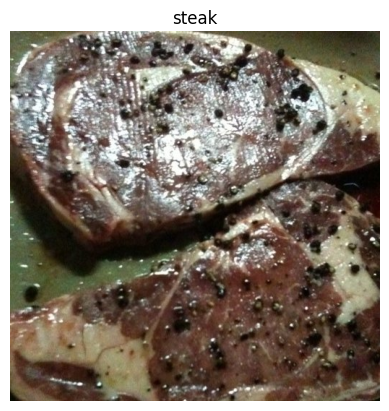

In [10]:
# View random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [11]:
tf.cast(tf.constant(img), dtype=tf.float32)  # our neural network converted image into tensors

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[102., 104.,  83.],
        [ 98., 100.,  79.],
        [ 98., 100.,  79.],
        ...,
        [ 60.,  50.,  38.],
        [ 57.,  45.,  33.],
        [ 51.,  39.,  27.]],

       [[ 94.,  96.,  75.],
        [ 94.,  96.,  75.],
        [ 96.,  98.,  77.],
        ...,
        [ 63.,  53.,  41.],
        [ 61.,  49.,  37.],
        [ 57.,  45.,  33.]],

       [[ 87.,  89.,  68.],
        [ 89.,  91.,  70.],
        [ 93.,  95.,  74.],
        ...,
        [ 62.,  55.,  39.],
        [ 61.,  52.,  37.],
        [ 59.,  50.,  35.]],

       ...,

       [[  5.,  11.,   0.],
        [  9.,  15.,   3.],
        [  9.,  12.,   1.],
        ...,
        [ 18.,  19.,   3.],
        [ 11.,  12.,   0.],
        [ 10.,  11.,   0.]],

       [[  8.,  14.,   2.],
        [ 12.,  18.,   6.],
        [ 12.,  15.,   4.],
        ...,
        [  4.,   6.,   0.],
        [  9.,  11.,   0.],
        [ 16.,  18.,   5.]],

       [[  7.,  1

In [12]:
# View the image shape
img.shape # (width, height, color_channels)

(512, 512, 3)

`Note:` As we've discussed before, many machine learning models, including neural network prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale**(also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [13]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.4       , 0.40784314, 0.3254902 ],
        [0.38431373, 0.39215686, 0.30980392],
        [0.38431373, 0.39215686, 0.30980392],
        ...,
        [0.23529412, 0.19607843, 0.14901961],
        [0.22352941, 0.17647059, 0.12941176],
        [0.2       , 0.15294118, 0.10588235]],

       [[0.36862745, 0.37647059, 0.29411765],
        [0.36862745, 0.37647059, 0.29411765],
        [0.37647059, 0.38431373, 0.30196078],
        ...,
        [0.24705882, 0.20784314, 0.16078431],
        [0.23921569, 0.19215686, 0.14509804],
        [0.22352941, 0.17647059, 0.12941176]],

       [[0.34117647, 0.34901961, 0.26666667],
        [0.34901961, 0.35686275, 0.2745098 ],
        [0.36470588, 0.37254902, 0.29019608],
        ...,
        [0.24313725, 0.21568627, 0.15294118],
        [0.23921569, 0.20392157, 0.14509804],
        [0.23137255, 0.19607843, 0.1372549 ]],

       ...,

       [[0.01960784, 0.04313725, 0.        ],
        [0.03529412, 0.05882353, 0.01176471],
        [0.03529412, 0

## Building CNN model

Let's build a `Convolutional Neural Network` to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our image
* Compile our CNN
* Fit the CNN model to training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)  # random seed for reproducability

# Preprocess data (scaling / normalize)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up data to data directory
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn in into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

# flow_from_directory automatically creates features and labels, so we are not passing X and y
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 222ms/step - accuracy: 0.6614 - loss: 0.6145 - val_accuracy: 0.8000 - val_loss: 0.4330
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.8174 - loss: 0.4349 - val_accuracy: 0.8420 - val_loss: 0.3620
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.8193 - loss: 0.4154 - val_accuracy: 0.8700 - val_loss: 0.3579
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - accuracy: 0.8629 - loss: 0.3699 - val_accuracy: 0.8580 - val_loss: 0.3352
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.8427 - loss: 0.3597 - val_accuracy: 0.8740 - val_loss: 0.3051


**Note:** Make sure to use a GPU for faster execution of epochs.

In [15]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using the same model as before


In [16]:
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_2 = model_2.fit(train_data,
                            epochs=5,
                            steps_per_epoch=len(train_data),
                            validation_steps = len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.4788 - loss: 0.6940
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.4995 - loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.4978 - loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.5025 - loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.4787 - loss: 0.6932


In [17]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite being having 20x more parameters than our CNN(model_1), model_2 performs not good.

In [18]:
# Improving model_2

tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.models.Sequential([
    # Increasing number of layers
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),  # Increasing number of hidden units
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - accuracy: 0.5751 - loss: 5.9062 - val_accuracy: 0.7380 - val_loss: 0.9131
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.6622 - loss: 1.8051 - val_accuracy: 0.7440 - val_loss: 0.8256
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.7330 - loss: 0.8154 - val_accuracy: 0.6820 - val_loss: 0.6584
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.7745 - loss: 0.5233 - val_accuracy: 0.7360 - val_loss: 0.5756
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.7404 - loss: 0.6208 - val_accuracy: 0.7820 - val_loss: 0.4562


In [19]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

In [20]:
multiples = 15073201/31101 # where, 15073201 = trainable params of model_3 && 31101 are trainable params of model_1(CNN)
print(f"Model_3 has almost {multiples}x times more trainable params than model_1\n still outperformed by model_1..")

Model_3 has almost 484.6532587376612x times more trainable params than model_1
 still outperformed by model_1..


`Note:`  You can think of trainable parameters as **patterns a model can learn from data**. Intuitvely, you might think more is a better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a CNN seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our CNN, these are often more helpful in deciphering between different **features** in an image.

## Binary Classification

1. Visualize the data
2. Preprocess the data (the main step here is scaling/normalization/converting into batches).
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied ( experimentation....)

### Visualize the data

['2824680.jpg']
Image shape: (512, 512, 3)
['1390308.jpg']
Image shape: (384, 512, 3)


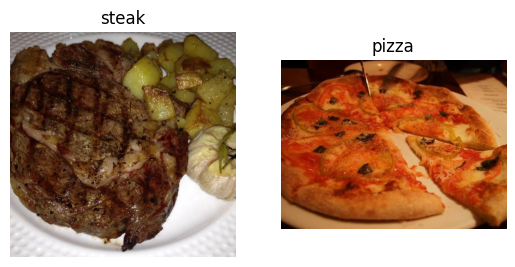

In [21]:
# Visualzie the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### Preprocess the data

In [22]:
# Define the directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

> A batch is a small subset of data. Rather than look at all ~1500 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. ~1,500 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in ~1,500 images in one hit could result in the model not being able to learn very well.

> Why 32?

> Because 32 is good for your health...

In [23]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
train_datagen, test_datagen

(<keras.src.legacy.preprocessing.image.ImageDataGenerator at 0x7ba0401152d0>,
 <keras.src.legacy.preprocessing.image.ImageDataGenerator at 0x7ba0439d4910>)

In [26]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,  # Target dir of images
                                               target_size=(224,224), # Target size of images
                                               class_mode="binary",  # type of data you're working with
                                               batch_size=32) # size of mini batches to load data

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of train data batch
images, labels = train_data.__next__() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [28]:
# How many batches are there?
len(train_data)

47

In [29]:
# Get the images
images[:3], images[0].shape

(array([[[[0.30588236, 0.17254902, 0.227451  ],
          [0.34901962, 0.21960786, 0.25490198],
          [0.4039216 , 0.2784314 , 0.2901961 ],
          ...,
          [0.16470589, 0.02745098, 0.1137255 ],
          [0.16862746, 0.01960784, 0.11764707],
          [0.15686275, 0.00784314, 0.10588236]],
 
         [[0.28235295, 0.14901961, 0.20392159],
          [0.34117648, 0.21176472, 0.24705884],
          [0.42352945, 0.29803923, 0.30980393],
          ...,
          [0.17254902, 0.02352941, 0.1137255 ],
          [0.1764706 , 0.02745098, 0.11764707],
          [0.16078432, 0.01176471, 0.10980393]],
 
         [[0.26666668, 0.13333334, 0.19607845],
          [0.32941177, 0.20000002, 0.23529413],
          [0.42352945, 0.29803923, 0.31764707],
          ...,
          [0.19215688, 0.04313726, 0.13333334],
          [0.1764706 , 0.02745098, 0.11764707],
          [0.16862746, 0.03137255, 0.1254902 ]],
 
         ...,
 
         [[0.62352943, 0.5803922 , 0.5647059 ],
          [0.60392

In [30]:
# View the first batch of labels
labels

array([1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.],
      dtype=float32)

### Creating a CNN model (with baseline)

A *baseline* is a relatively simple model or existing result that we setup when beginning a machine learning experiment and then as we keep experimenting, we try to beat the baseline.

In [32]:
# Importing required dependencies for our model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.models import Sequential

In [33]:
# Creating the baseline model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)), # input layer
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")  # output layer (working with binary classification)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
